<a href="https://colab.research.google.com/github/nekotanku/colab/blob/master/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use("ggplot")

In [2]:
#乱数
torch.manual_seed(123)

In [3]:
a = 3
b = 2
#view(100,1) -> view(バッチの次元, 入力データの次元)
x = torch.linspace(0,5,100).view(100, 1)

In [4]:
eps = torch.randn(100,1)
y = a * x + b + eps

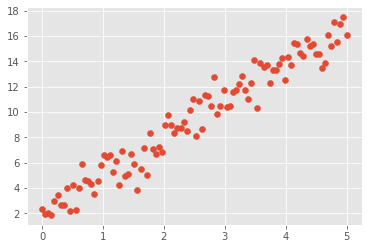

In [5]:
plt.scatter(x, y)

In [6]:
#モデルを作成
class LR(nn.Module):
    #初期化
    def __init__(self):
        super().__init__()
        self.linear= nn.Linear(in_features=1, out_features=1)
    #順伝播
    def forward(self, x):
        output  = self.linear(x)
        return output 


In [7]:
#インスタンス作成
model = LR()

In [8]:
#予測
x_test = torch.tensor([[1.0], [2.0]])
model(x_test)

tensor([[-0.6505],
        [-1.4166]], grad_fn=<AddmmBackward>)

In [9]:
x2 = torch.linspace(0, 3, 100).view(100, 1)
x2.size()

torch.Size([100, 1])

In [10]:
y_pred = model(x2)

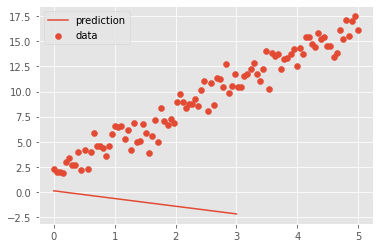

In [11]:
plt.plot(x2, y_pred.detach(), label='prediction')
plt.scatter(x, y, label="data")
plt.legend()

In [12]:
#損失関数
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [13]:
losses = []
num_epoch = 500
for epoch in range(num_epoch):
    #勾配初期化
    optimizer.zero_grad()
    y_pred  = model(x)
    loss = criterion(y_pred, y)
    #誤差逆伝播
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        #loss.item -> Tensorから中の値を取り出す
        print("epoch:{}, loss:{}".format(epoch, loss.item()))
        losses.append(loss.item())


epoch:0, loss:156.7843017578125
epoch:10, loss:108.74256896972656
epoch:20, loss:75.52831268310547
epoch:30, loss:52.56507873535156
epoch:40, loss:36.68894958496094
epoch:50, loss:25.712501525878906
epoch:60, loss:18.12348175048828
epoch:70, loss:12.876379013061523
epoch:80, loss:9.248371124267578
epoch:90, loss:6.7397308349609375
epoch:100, loss:5.004981517791748
epoch:110, loss:3.805262804031372
epoch:120, loss:2.9754462242126465
epoch:130, loss:2.4013638496398926
epoch:140, loss:2.0040884017944336
epoch:150, loss:1.7290520668029785
epoch:160, loss:1.5385340452194214
epoch:170, loss:1.406448245048523
epoch:180, loss:1.3147624731063843
epoch:190, loss:1.2510122060775757
epoch:200, loss:1.206579566001892
epoch:210, loss:1.1755024194717407
epoch:220, loss:1.1536648273468018
epoch:230, loss:1.1382170915603638
epoch:240, loss:1.127191185951233
epoch:250, loss:1.1192246675491333
epoch:260, loss:1.1133769750595093
epoch:270, loss:1.1089967489242554
epoch:280, loss:1.1056344509124756
epoch:2

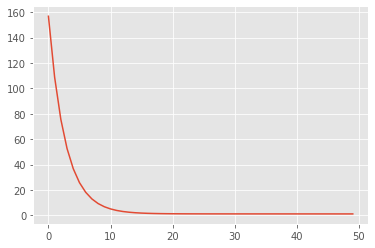

In [14]:
plt.plot(losses)

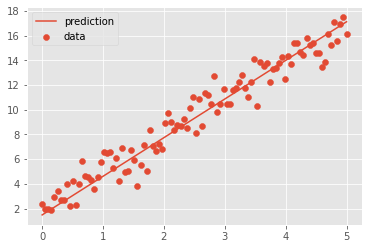

In [16]:
x_test = torch.linspace(0, 5, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction" )
plt.scatter(x, y, label="data")
plt.legend()